## Problem 1

#### 1)

In [1]:
import numpy as np

In [2]:
mu = np.array([.08,.14,.16])
std = np.array([.10,.30,.35])
cor = .2
r0 = .05

cov = np.empty((3,3))
for i in range(3):
    for j in range(3):
        if j==i:
            cov[i,j] = std[i]**2
        else:
            cov[i,j] = cor * std[i] * std[j]

cov_inv = np.linalg.inv(cov)

In [3]:
w_tan = np.matmul(cov_inv, mu-r0)/(np.matmul(cov_inv.sum(0), mu) - cov_inv.sum()*r0)

In [4]:
mean = w_tan.dot(mu)
stdv = np.sqrt(np.matmul(w_tan,cov).dot(w_tan))
print('Tangency portfolio summary:\n')
print('Mean: {:0.2f}%'.format((mean)*100))
print('Std: {:0.2f}%'.format(stdv*100))
print('Sharpe ratio: {:0.2f}'.format((mean-r0)/stdv))

Tangency portfolio summary:

Mean: 10.73%
Std: 12.83%
Sharpe ratio: 0.45


#### 2)

In [14]:
# fix mu_z at r0
mu_z = r0
A = cov_inv.sum()
B = cov_inv.sum(0).dot(mu)
C = mu.transpose().dot(cov_inv).dot(mu)
D = A*C - B**2

In [35]:
# find weights that minimize sigma_z for given mu_z
lam = (C - mu_z*B)/D
gam = (mu_z*A - B)/D

w_z = lam * cov_inv.sum(1) + gam * cov_inv.dot(mu)
std_z = np.sqrt(w_z.transpose().dot(cov).dot(w_z))

In [34]:
print('Zero beta (to tangency) portfolio:\n')
print('Weights:', w_z)
print('Mean: {:0.2f}%'.format(mu_z*100))
print('Std: {:0.2f}%'.format(std_z*100))
print('Variance: {:0.4f}'.format(std_z**2))

Zero beta (to tangency) portfolio:

Weights: [ 1.42362301 -0.19449204 -0.22913097]
Mean: 5.00%
Std: 15.52%
Variance: 0.0241


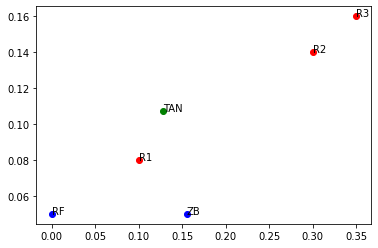

In [40]:
import matplotlib.pyplot as plt

n = ['R1','R2','R3']

plt.plot(std,mu,'or')
plt.plot(stdv,mean,'og')
plt.plot(0,r0,'ob')
plt.plot(std_z, mu_z, 'ob')

for i, txt in enumerate(n):
    plt.annotate(txt, (std[i],mu[i]))
plt.annotate('TAN',(stdv,mean))
plt.annotate('RF',(0,r0))
plt.annotate('ZB',(std_z,mu_z));

#### 3)

In [66]:
cov_tz = np.array([[stdv**2,0],[0,std_z**2]])
cov_tz_inv = np.linalg.inv(cov_tz)
lambd = 1
m = 1.3
a = np.arange(1,101,1)
mu_tz = np.array([mean,mu_z])
R_e = mu_tz - r0
xs = np.empty((100,2))
for i in range(len(xs)):
    xs[i,] = (1/a[i] * (R_e - lambd).dot(cov_tz_inv))

In [71]:
mus = xs.dot(mu_tz)
sds = np.empty(100)
for i in range(len(sds)):
    sds[i] = np.sqrt( xs[i].dot(cov_tz).dot(xs[i]) )
srs = mus/sds

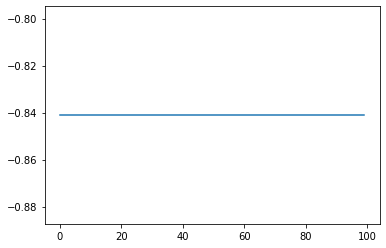

In [73]:
plt.plot(srs)